Подключаем библиотеки

In [33]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

Задаем координаты и угол поворота

In [34]:
point = np.array([1, 2, 3])
origin = np.array([0, 0, 0])
shift_rotated_origin = np.array([3, 2, 1])
rotate_origin_y = 45

Создаем повернутое на 45 градусов пространство

In [35]:
r0 = R.from_euler("y", rotate_origin_y, degrees=True)

Получаем матрицу преобразования
$$
R_y(φ) =
\begin{pmatrix}
\\cos(-φ_y) & 0 & -sin(-φ_y)
\\0 & 1 & 0
\\sin(-φ_y) & 0 & cos(-φ_y)
\end{pmatrix}
$$

In [36]:
r0_matrix = r0.as_matrix()
print(r0_matrix)

[[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]


Расчитываем координаты точки относительно повернутого пространства по формуле

$$x' = x * cos(-45) + z * -sin(-45)$$
$$y' = y$$
$$z' = x * sin(-45) + z * cos(-45)$$

Рассчитаные значения синусов и косинусов находятся в матрице преобразования повернутого пространства

Далее изменяем новые координаты точки на вектор смещения пространства
$$x" = x' + V_x$$
$$y" = y' + V_y$$
$$z" = z' + V_z$$
Отображаем результат
$$x = -0.17$$
$$y = 0.0$$
$$z = 0.41$$


In [37]:
point_position = np.array([sum(point * i) for i in r0_matrix]) - shift_rotated_origin
print("x = {} y = {} z = {}".format(*point_position.round(2)))

x = -0.17 y = 0.0 z = 0.41


**Отрисуем результат**

Создадим изначальное пространство и пересчитаем вектор смещения начала координат из повернутого пространства в изначальное

In [38]:
r1 = R.identity()
r2 = R.from_euler("y", -rotate_origin_y, degrees=True)
r2_matrix = r2.as_matrix()
shift_origin = np.array([sum(shift_rotated_origin * i) for i in r2_matrix])

Функция отрисовки пространства

In [39]:
def plot_rotated_axes(ax, r, name=None, offset=(0, 0, 0), scale=1):
    colors = ("#FF6666", "#005533", "#1199EE")
    loc = np.array([offset, offset])
    for i, (axis, c) in enumerate(zip((ax.xaxis, ax.yaxis, ax.zaxis), colors)):
        axlabel = axis.axis_name
        axis.set_label_text(axlabel)
        axis.label.set_color(c)
        axis.line.set_color(c)
        axis.set_tick_params(colors=c)
        line = np.zeros((2, 3))
        line[1, i] = scale
        line_rot = r.apply(line)
        line_plot = line_rot + loc
        ax.plot(line_plot[:, 0], line_plot[:, 1], line_plot[:, 2], c)
        text_loc = line[1]*1.2
        text_loc_rot = r.apply(text_loc)
        text_plot = text_loc_rot + loc[0]
        ax.text(*text_plot, axlabel.upper(), color=c,
                va="center", ha="center")
    ax.text(*offset, name, color="k", va="center", ha="center",
            bbox={"fc": "w", "alpha": 0.8, "boxstyle": "circle"})

Функция отрисовки точки в пространстве

In [40]:
def plot_point(ax, point):
  color = ("#FA05BD")
  ax.scatter(point[0], point[1], point[2], c=color)


Изображение результатов

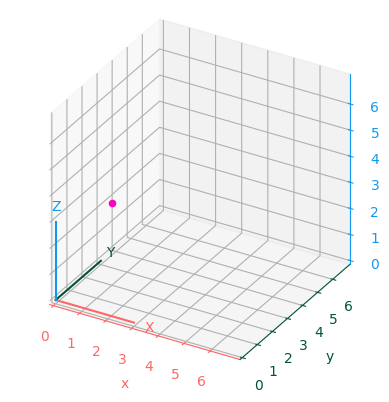

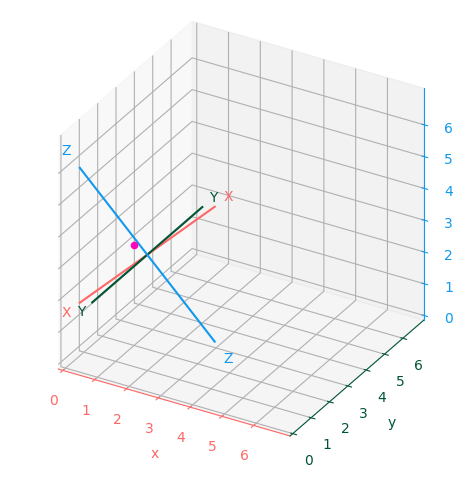

In [41]:
ax0 = plt.figure().add_subplot(projection="3d", proj_type="ortho")
ax1 = plt.figure().add_subplot(projection="3d", proj_type="ortho")

plot_rotated_axes(ax0, r1, scale=3)
plot_rotated_axes(ax1, r2, offset=shift_origin, scale=3)
plot_rotated_axes(ax1, r2, offset=shift_origin, scale=-3)

plot_point(ax0, point)
plot_point(ax1, point)

ax0.set(xlim=(0, 7), ylim=(0, 7), zlim=(0, 7))
ax0.set(xticks=range(0, 7), yticks=range(0, 7), zticks=range(0, 7))
ax0.set_aspect("equal", adjustable="box")

ax1.set(xlim=(0, 7), ylim=(0, 7), zlim=(0, 7))
ax1.set(xticks=range(0, 7), yticks=range(0, 7), zticks=range(0, 7))
ax1.set_aspect("equal", adjustable="box")

plt.tight_layout()
plt.show()